# pavankumar kamble

In [1]:
import pandas as pd
import numpy as np
from sklearn import svm
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(r'D:\data science\data science assg\ass.17 SVM\forestfires.csv')

In [3]:
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


<AxesSubplot:>

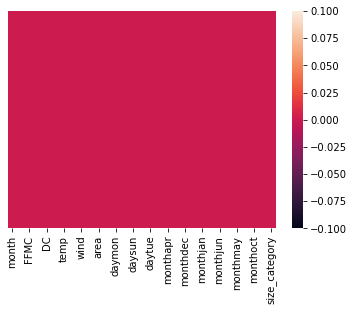

In [4]:
sns.heatmap(df.isnull(),yticklabels=False)

In [5]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['size_category']=le.fit_transform(df['size_category'])
df['month']=le.fit_transform(df['month'])
df['day']=le.fit_transform(df['day'])
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,1


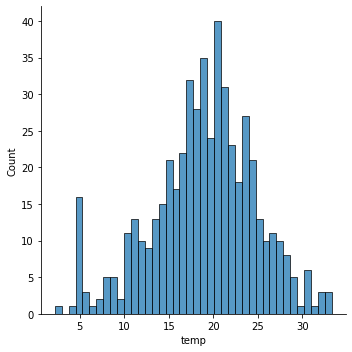

In [6]:
sns.displot(df['temp'].dropna(),bins=40)

<AxesSubplot:xlabel='size_category', ylabel='count'>

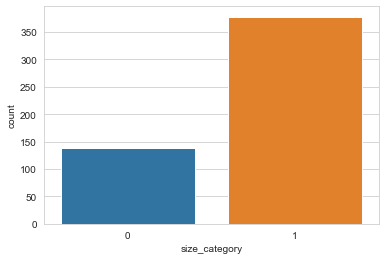

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='size_category',data=df)

# Model 

In [8]:
X = df.drop('size_category', axis=1)
y = df['size_category']

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [10]:
classification_ln =SVC( kernel='linear')
classification_ln.fit(X_train,y_train)

SVC(kernel='linear')

In [11]:
classification_ln.score(X_test,y_test)*100

97.11538461538461

# predictions

In [12]:
pre =classification_ln.predict(X_test)
pre

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1])

In [13]:
from sklearn.metrics import classification_report
print(classification_report(pre,y_test))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        33
           1       0.96      1.00      0.98        71

    accuracy                           0.97       104
   macro avg       0.98      0.95      0.97       104
weighted avg       0.97      0.97      0.97       104

